### **Part 1 - Trend time path for real GDP**

In [1]:
# Importing libraries/packages and assigning them aliases like np, pd or plt
# We can assign any alias we wish. 'np' and 'pd' are example of aliases
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Reading data from the excel file 'pwt100.xlsx' from sheet 'Data'
# 'all_data' is the name of the variable which stores the dataframe (dataframe is basically a table in pandas library framework)
all_data = pd.read_excel('./Coursework_Mishra_data1.xlsx', sheet_name = 'Data')

In [3]:
# There is a column named 'country' in the 'all_data' dataframe which we are going to use for filtering data relevant for the project

# Getting all the rows which are relevant for Spain and storing them in variable 'spain'
spain      = all_data[all_data['country'] == 'Spain']

# Getting all the rows which are relevant for Costa Rica and storing them in variable 'costa_rica'
costa_rica = all_data[all_data['country'] == 'Costa Rica']

# 'rgdpna' column contains 'Real GDP at constant 2017 national prices (in mil. 2017US$)'
# Creating another column called 'log_rgdpna' which is calculated by taking the log of 'rgdpna'
spain.loc[:,'log_rgdpna']      = spain.loc[:,'rgdpna'].apply(lambda x: np.log(x))
costa_rica.loc[:,'log_rgdpna'] = costa_rica.loc[:,'rgdpna'].apply(lambda x: np.log(x))

# 1st value represent the number of rows and 2nd value represents number of columns in the dataframe ('df' in short)
print(spain.shape)
print(costa_rica.shape)


(70, 53)
(70, 53)


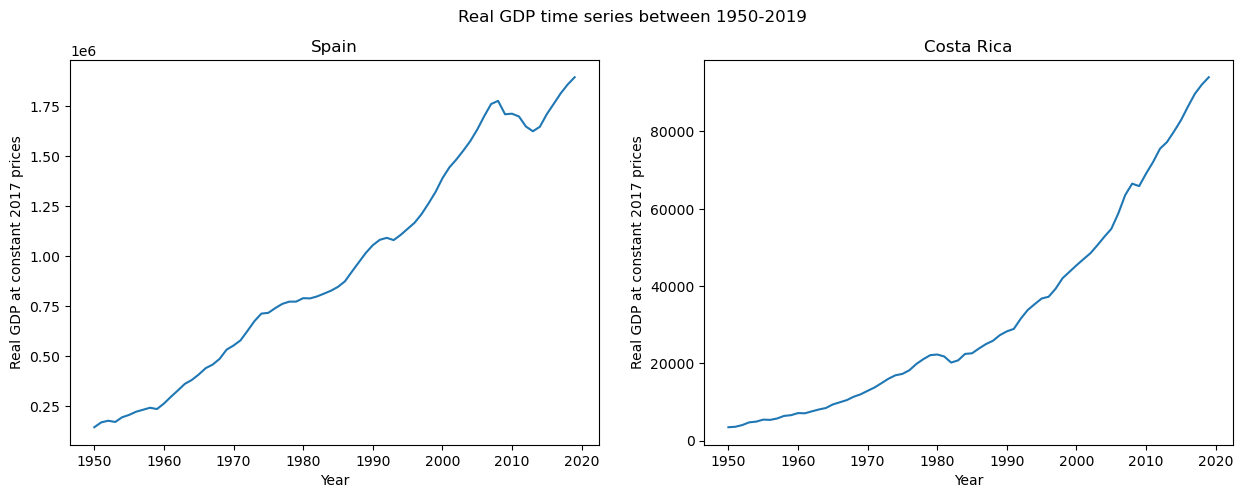

In [4]:
#*** CALCULATING TREND TIME PATH FOR REAL GDP AT CONSTANT 2017 NATIONAL PRICES


# Setting the size of the panel(or chart) in which the graphs will be plotted
plt.figure(figsize=(15, 5))

# Defining the layout of the chart
# Inside plt.subplot(xyz), first number x will determine the number of rows of plots in the panel
# y -> number of columns of plots
# z -> position of the current plot (the positions are filled row-wise)
plt.subplot(121)
# first argument will be the data on x-axis and second argument will be y-axis values
plt.plot(spain['year'], spain['rgdpna'])
# Labelling the y-axis
plt.ylabel('Real GDP at constant 2017 prices')
# Labelling the x-axis
plt.xlabel('Year')
# Labelling the graph
plt.title('Spain')

# Here, x and y should be same as defined above. Not having them same won't throw error but will give weired results.
# z should be less than x*y. Otherwise, it will throw an error. Because in x by y layout, we can not have more than x*y positions
plt.subplot(122)
plt.plot(costa_rica['year'], costa_rica['rgdpna'])
plt.ylabel('Real GDP at constant 2017 prices')
plt.xlabel('Year')
plt.title('Costa Rica')

# Labelling the panel/chart
plt.suptitle('Real GDP time series between 1950-2019')

# This displays the plot
plt.show()

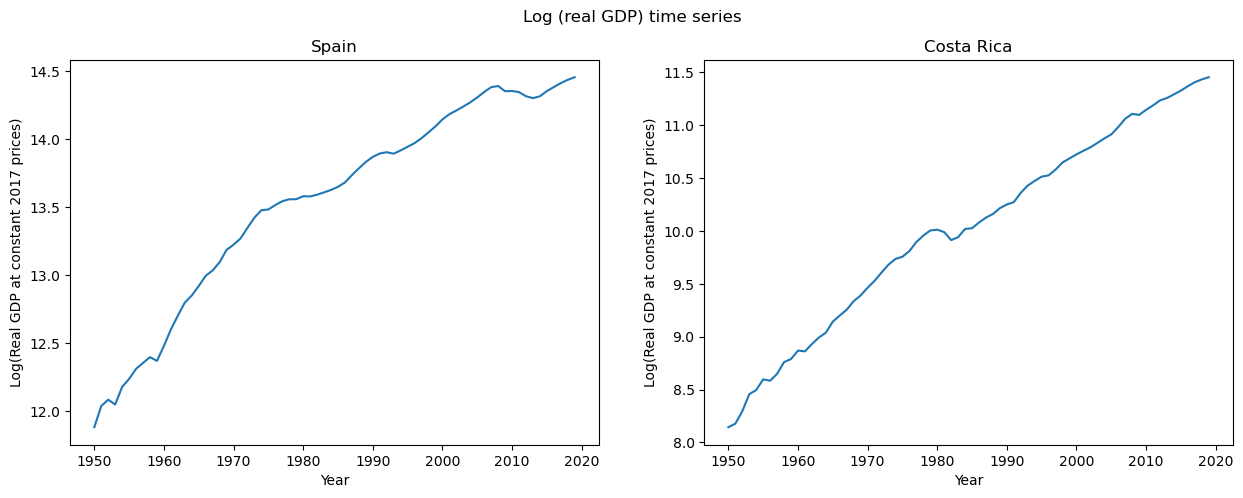

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(spain['year'], spain['log_rgdpna'])
plt.ylabel('Log(Real GDP at constant 2017 prices)')
plt.xlabel('Year')
plt.title('Spain')

plt.subplot(122)
plt.plot(costa_rica['year'], costa_rica['log_rgdpna'])
plt.ylabel('Log(Real GDP at constant 2017 prices)')
plt.xlabel('Year')
plt.title('Costa Rica')

plt.suptitle('Log (real GDP) time series')
plt.show()

In [6]:
# PLOTING (the logarithm of) OF THE REAL GDP AND THE TREND TIME PATH


# Defining a function called 'best_linear_fit' to calculate the slope and the intercept of the estimated best fit line
# X-values are given in first argument as a column of df
# Y-values are given in second argument as a column of df
# Output of the function will be two values, say a and b, in the form of a list -> [a,b]

def best_linear_fit(X,y):

    y = y.to_numpy()
    y = np.expand_dims(y, axis = 0)
    y = np.transpose(y)

    X = X.to_numpy()
    ones = np.ones(X.shape)
    X = np.stack( ( ones , np.transpose(X) ) , axis = 1 )
    X_transpose = np.transpose(X)

    b = np.matmul ( np.matmul ( np.linalg.inv( np.matmul( X_transpose , X) ) , X_transpose ) , y )
    b = np.ndarray.flatten(b)

    return list(b)

# We can use them to draw the line of best fit by plugging the x-axis values in equation y = b + a*x

# Finding the line of best fit for Costa Rica from year 1950 to 1979 (both included)
costa_rica_fit = best_linear_fit( costa_rica['year'][0:30], costa_rica['log_rgdpna'][0:30] )

# Finding the line of best fit for Costa Rica from year 1980 to 2019 (both included)
costa_rica_fit2 = best_linear_fit( costa_rica['year'][32:69], costa_rica['log_rgdpna'][32:69] )

# Finding the line of best fit for Spain from year 1950 to 1974 (both included)
spain_fit1     = best_linear_fit( spain['year'][0:25], spain['log_rgdpna'][0:25] )

# Finding the line of best fit for Spain from year 1974 to 2007 (both included)
spain_fit2     = best_linear_fit( spain['year'][25:58], spain['log_rgdpna'][25:58] )

In [7]:
# Calculating the y-values using the output of the best_linear_fit function

costa_rica.loc[:,'log_rgdpna_fit'] = costa_rica_fit[0] + costa_rica_fit[1]*costa_rica['year'][0:70]
costa_rica.loc[:,'log_rgdpna_fit2'] = costa_rica_fit2[0] + costa_rica_fit2[1]*costa_rica['year'][32:70]

spain.loc[:,'log_rgdpna_fit1']     = spain_fit1[0]     + spain_fit1[1]*spain['year'][0:70]
spain.loc[:,'log_rgdpna_fit2']     = spain_fit2[0]     + spain_fit2[1]*spain['year'][25:70]

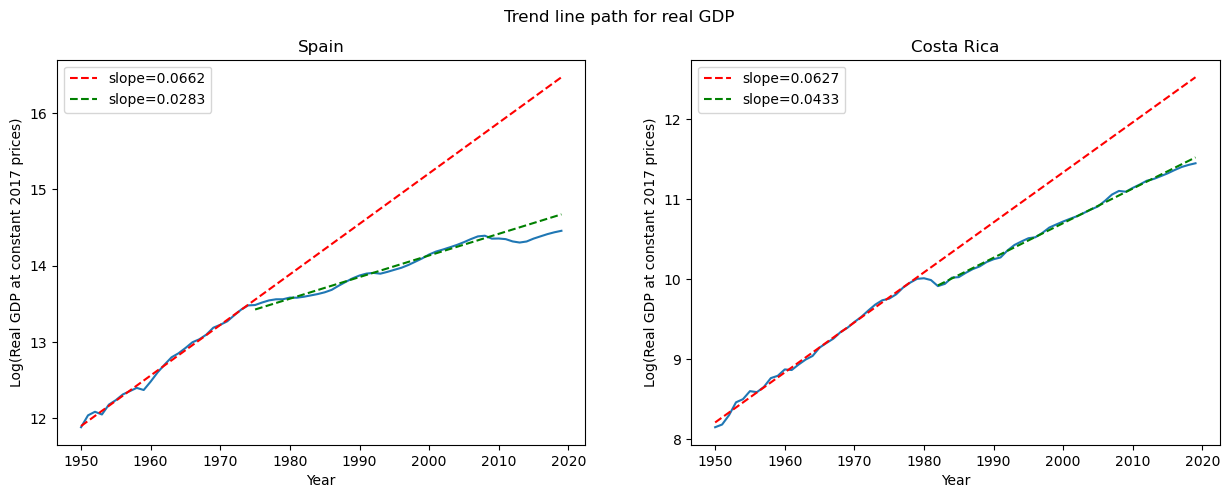

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(121)

# Plotting multiple graphs by fitting trend lines on the time path of real GDP

plt.plot(spain['year'], spain['log_rgdpna'])
plt.plot(spain['year'], spain['log_rgdpna_fit1'], '--r', label='slope='+str(round(spain_fit1[1],4)))
plt.plot(spain['year'], spain['log_rgdpna_fit2'], '--g', label='slope='+str(round(spain_fit2[1],4)))
plt.ylabel('Log(Real GDP at constant 2017 prices)')
plt.xlabel('Year')
plt.title('Spain')
plt.legend(loc='upper left')

plt.subplot(122)
plt.plot(costa_rica['year'], costa_rica['log_rgdpna'])
plt.plot(costa_rica['year'], costa_rica['log_rgdpna_fit'], '--r', label='slope='+str(round(costa_rica_fit[1],4)))
plt.plot(costa_rica['year'], costa_rica['log_rgdpna_fit2'], '--g', label='slope='+str(round(costa_rica_fit2[1],4)))
plt.ylabel('Log(Real GDP at constant 2017 prices)')
plt.xlabel('Year')
plt.title('Costa Rica')
plt.legend(loc='upper left')

plt.suptitle('Trend line path for real GDP')
plt.savefig('gdp-trend.jpeg')
plt.show()

# New Section

### **Part 2 - Growth Accounting**

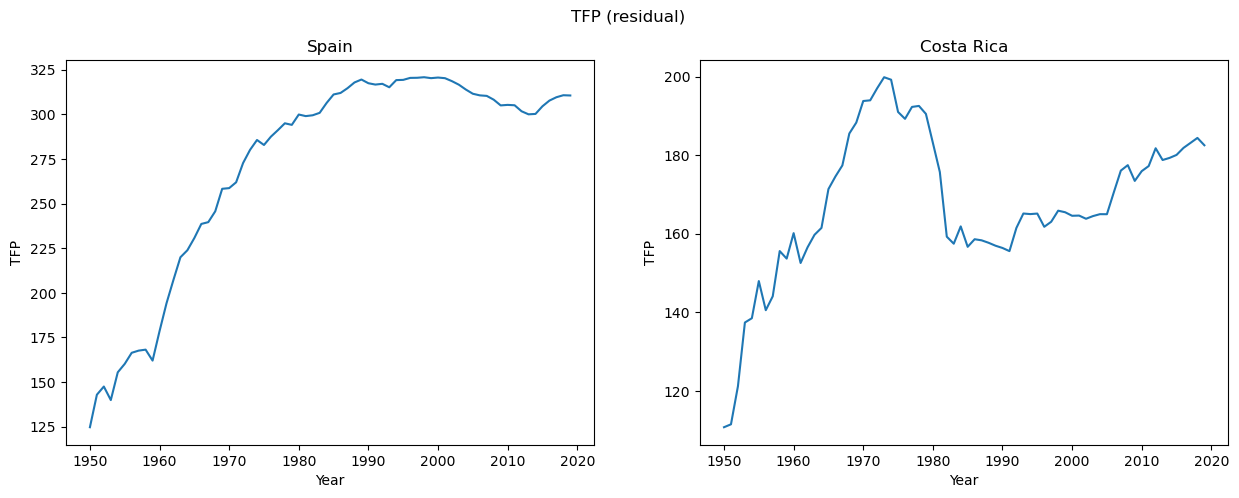

In [9]:
### (1 - alpha) for each country is taken as the 70 year average of 'labsh' variable
### 'labsh' is share of labour compensation in GDP at current national prices

# Finding 'alpha' using the 70 year average of 'labsh' variable and rounding it off to two decimal places
# This comes out to be 0.38
alpha_spain = 1 - np.round(spain['labsh'].mean(),2)

# Finding the 'TFP' by plugging all the variables into the production function equation (y = A(K^alpha)((hL)^(1-alpha)) )
spain['TFP'] = spain['rgdpna']/( (spain['rnna'])**( alpha_spain ) * (spain['emp']*spain['hc'])**( 1 - alpha_spain ) )

# The value of TFP calculates to be 0.42
alpha_costarica = 1 - np.round(costa_rica['labsh'].mean(),2)
costa_rica['TFP'] = costa_rica['rgdpna']/( (costa_rica['rnna'])**( alpha_costarica ) * (costa_rica['emp']*costa_rica['hc'])**( 1 - alpha_costarica ) )

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(spain['year'], spain['TFP'])
plt.ylabel('TFP')
plt.xlabel('Year')
plt.title('Spain')

plt.subplot(122)
plt.plot(costa_rica['year'], costa_rica['TFP'])
plt.ylabel('TFP')
plt.xlabel('Year')
plt.title('Costa Rica')

plt.suptitle('TFP (residual)')
plt.savefig('tfp-trend.jpeg')
plt.show()


In [10]:
# A function named gen_accounting_df is created which generates growth accounting table of Spain and Costa Rica
# Macro data of the country is contained in a dataframe 'country_data'
# n is the number of years for which our period of unit analysis is done

def gen_accounting_df(country_data, n):

    n_last = (2019 - 1950)%n
    country_data = country_data.set_index(keys = 'year', drop = True)

    # creating a new dictionary for populating the dataframe
    accounting_table_dict = {}

    # Populating the dictionary with the data
    for i in range(1950,2020,n):
        
        # Calculating the n-year period growth rates of GDP, Capital, Labour and Human Capital
        
        if(i == 2019 - n_last):
            if(n_last == 0):
                continue
            period_val = str(i) + '-' + str(i+n_last)
            gdp_growth_val = ( country_data.loc[i+n_last , 'rgdpna'] - country_data.loc[i , 'rgdpna'] )*100 / country_data.loc[i , 'rgdpna']
            k_growth_val   = ( country_data.loc[i+n_last , 'rnna']   - country_data.loc[i , 'rnna']   )*100 / country_data.loc[i , 'rnna']
            l_growth_val   = ( country_data.loc[i+n_last , 'emp']    - country_data.loc[i , 'emp']    )*100 / country_data.loc[i , 'emp']
            h_growth_val   = ( country_data.loc[i+n_last , 'hc']     - country_data.loc[i , 'hc']     )*100 / country_data.loc[i , 'hc']

        else:
            period_val = str(i) + '-' + str(i+n)
            gdp_growth_val = ( country_data.loc[i+n , 'rgdpna'] - country_data.loc[i , 'rgdpna'] )*100 / country_data.loc[i , 'rgdpna']
            k_growth_val   = ( country_data.loc[i+n , 'rnna']   - country_data.loc[i , 'rnna']   )*100 / country_data.loc[i , 'rnna']
            l_growth_val   = ( country_data.loc[i+n , 'emp']    - country_data.loc[i , 'emp']    )*100 / country_data.loc[i , 'emp']
            h_growth_val   = ( country_data.loc[i+n , 'hc']     - country_data.loc[i , 'hc']     )*100 / country_data.loc[i , 'hc']

        # Calculating the growth rate of TFP
        
        tfp_growth_val = gdp_growth_val - alpha_spain*( k_growth_val ) - (1 - alpha_spain)*( l_growth_val + h_growth_val )

        # Calculating the contribution of variables(eg. TFP, Capital, Skilled Labour) to GDP growth
        
        tfp_contr_val =  tfp_growth_val/gdp_growth_val
        k_contr_val   =  alpha_spain*k_growth_val/gdp_growth_val
        hl_contr_val  =  (1 - alpha_spain)*(h_growth_val + l_growth_val)/gdp_growth_val
        h_contr_val   =  (1 - alpha_spain)*(h_growth_val)/gdp_growth_val
        l_contr_val   =  (1 - alpha_spain)*(l_growth_val)/gdp_growth_val

        # Presenting the calculated TFP, Capital, and Skilled Labour contribution to GDP in row format
        row = [tfp_growth_val , gdp_growth_val , k_growth_val , l_growth_val , h_growth_val , tfp_contr_val , k_contr_val , hl_contr_val , h_contr_val , l_contr_val]
        # Setting the index value of the row
        accounting_table_dict[period_val] = row

    # Making a dataframe from the dictionary
    accounting_table = pd.DataFrame.from_dict(accounting_table_dict, orient='index' , columns=['TFP Growth', 'GDP Growth', 'Capital Growth', 'Labour Growth', 'Human Capital Growth', \
                                                                                           'Contr of TFP to GDP Growth', 'Contr of Capital to GDP Growth', 'Contr of Quality Labour to GDP Growth', \
                                                                                           'Contr of Human Capital to GDP Growth', 'Contr of Labour to GDP Growth'])      
    
    # Inserting a new column named period. It contains values like '1965-70', '1970-75', etc
    accounting_table.insert(loc=0, column='Period', value=accounting_table.index)

    return accounting_table

In [15]:
# Setting n-year period, to generate growth accounting table with subdivsions for each 5 years
n = 8

# Generates growth accounting table for n-year period for Spain
accounting_table_spain = gen_accounting_df(spain,n).round(3)

# Generates growth accounting table for n-year period for Costa Rica
accounting_table_costa_rica = gen_accounting_df(costa_rica,n).round(3)

In [16]:
# Generating excel file for displaying growth accounting tables calculated earlier
# Growth accounting tables for Costa Rica and Spain are displayed in two different excel sheets

writer = pd.ExcelWriter('growth_accounting_table_'+str(n)+'yr_period.xlsx',engine='xlsxwriter')   
workbook=writer.book
worksheet_costarica=workbook.add_worksheet('Costa Rica')
worksheet_spain=workbook.add_worksheet('Spain')
writer.sheets['Costa Rica'] = worksheet_costarica
writer.sheets['Spain'] = worksheet_spain

accounting_table_costa_rica.to_excel(writer,sheet_name='Costa Rica',startrow=0 , startcol=0, index=False)   
accounting_table_spain.to_excel(writer,sheet_name='Spain',startrow=0 , startcol=0, index=False)   

writer.close()

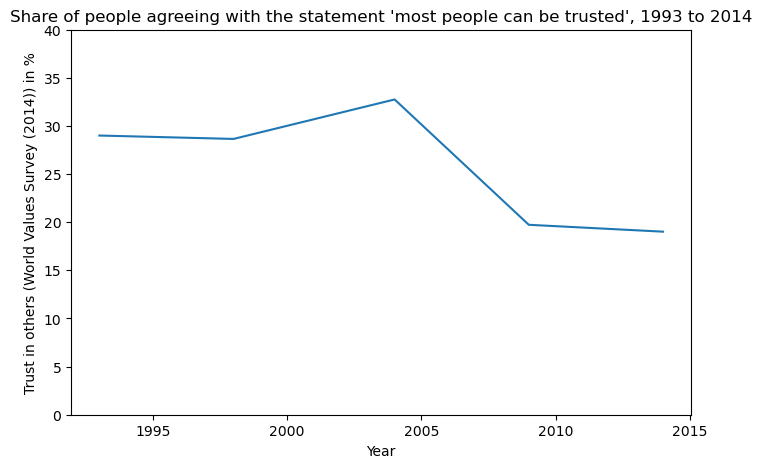

In [13]:
# PLOTTING THE TIME-SERIES OF INTER-PERSONAL TRUST IN SPAIN

trust = pd.read_csv('Coursework_Mishra_data2.csv')
trust = trust[trust['Entity'] == 'Spain']

plt.figure(figsize=(8, 5))

plt.plot(trust['Year'], trust['Trust in others (World Values Survey (2014))'])
plt.ylabel('Trust in others (World Values Survey (2014)) in %')
plt.xlabel('Year')
plt.yticks(np.arange(0, 45, step=5))
plt.title("Share of people agreeing with the statement 'most people can be trusted', 1993 to 2014")

plt.savefig('trust-spain.jpeg')
plt.show()

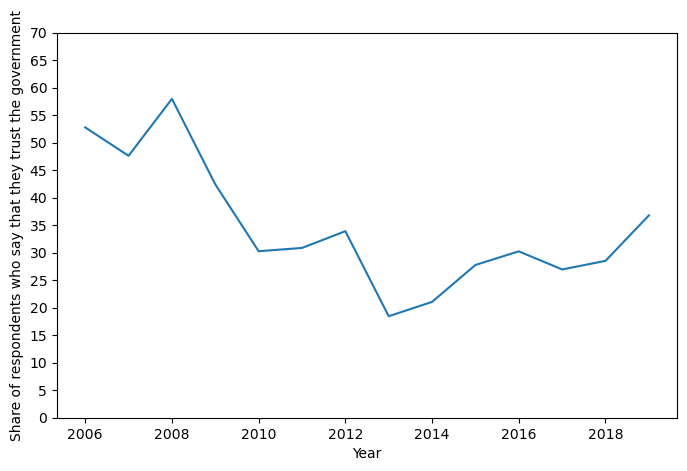

In [14]:
# PLOTTING THE TIME-SERIES OF THE SPANISH CITIZENS' TRUST IN THE NATIONAL GOVERNMENT

trust = pd.read_csv('Coursework_Mishra_data3.csv')
trust = trust[trust['LOCATION'] == 'ESP']

plt.figure(figsize=(8, 5))

plt.plot(trust['TIME'], trust['Value'])
plt.ylabel('Share of respondents who say that they trust the government')
plt.xlabel('Year')
plt.yticks(np.arange(0, 75, step=5))
# plt.title("Share of people agreeing with the statement 'most people can be trusted', 1993 to 2014")

plt.savefig('trust-govt.jpeg')
plt.show()